# Waze Review Sentiment Analysis

I will be performing an App Review Sentiment Analysis on the Waze mobile app dataset so as to evaluate and understand the sentiments expressed in user reviews over a 15 year span; 2009 through 2023.</b> 

I will use data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.</b>

I will also perform Exploratory Data Analysis on the dataset to answer a few questions derived along the way.</b>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# Load the dataset
waze_data = pd.read_csv('WAZE_REVIEWS.csv')
waze_data

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,6caba53d-789d-4733-bad5-c7491daf80f2,152618553977019693742,A Google user,Nice app need to add red light cam.,5,0,0.99.2.3,2009-06-30 16:48:15
1,1,30c15838-8b02-4dae-8f51-25905cb40b68,234382942865437071667,A Google user,Really cool social app. Lots of potential to b...,5,0,0.99.2.3,2009-06-30 16:58:43
2,2,c090400e-f88f-4129-930d-a650f3163a11,174473604608358796368,A Google user,I was all excited about this app (ehat a great...,1,0,0.99.2.3,2009-06-30 17:08:33
3,3,f6f37456-793b-4786-af6e-454a811361bf,286593453219054880269,A Google user,I love this app! Lol,5,0,0.99.2.3,2009-06-30 17:37:22
4,4,8ae5d962-7c0c-476d-82fa-79f6e5484acc,167276875678680630145,A Google user,Great app i like the idea of your car being pa...,4,0,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...,...,...,...,...,...
780068,780068,01655504-5a51-4c19-b313-2bd5fa3f253a,680743620884748258838,Ma********ll,Freezes,3,0,NaN,2023-11-17 03:18:26
780069,780069,f04306cb-af60-4a44-aebc-c37122620319,266638684561117704682,Zu******el,To stuck,1,0,NaN,2023-11-17 03:18:38
780070,780070,894e3c41-ca20-4781-9308-70eeb060a865,154572309081670894420,br**********ji,racist made app,1,0,4.99.0.2,2023-11-17 03:23:20
780071,780071,4fafb0b1-485e-473e-9bcd-d5c9848424d2,154995071911163107981,Mo***********da,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,0,4.99.1.1,2023-11-17 04:05:02


In [3]:
# lets take a look at 5 random rows
waze_data.sample(5)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
583808,583808,40e2c204-490e-404f-932f-789e59c06704,151672556396836377199,A Google user,Use too much toll. At times reception quite po...,4,0,4.32.0.3,2017-11-28 05:01:04
601714,601714,c879a01f-ee8e-44da-a3cb-dd5d78bb04ef,658016407893289422725,A Google user,"DANGEROUS app.Apart from just navigating, the ...",2,0,4.36.0.1,2018-04-16 15:36:38
493704,493704,4334e810-0a4a-42ac-bf4f-615a7805c7d3,525908754876505096659,A Google user,Better than the last update we got really work...,5,1,4.21.0.0,2017-03-23 13:13:53
523708,523708,17a5032f-f2b8-43b4-9ee6-3e68b32efec3,135728589789954296070,A Google user,Great reliable spot on,5,0,NaN,2017-06-21 07:20:02
768408,768408,8eb97115-4a8c-4e66-b112-dff11a03a5c8,264814050924424502758,Da*********re,Good for long journeys but can only do 2 desti...,3,0,4.84.0.2,2023-03-11 20:50:18


In [4]:
# lets take a look at the columns
waze_data.columns

Index(['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name',
       'review_text', 'review_rating', 'review_likes', 'author_app_version',
       'review_timestamp'],
      dtype='object')

In [5]:
# we only need a few key columns so we will create a subset
waze_data = waze_data[['review_text', 'review_rating','author_app_version',
       'review_timestamp' ]]
waze_data

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26
780069,To stuck,1,NaN,2023-11-17 03:18:38
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [6]:
# lets take a look at the datatypes as well as check for any null values
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780073 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775559 non-null  object
 1   review_rating       780073 non-null  int64 
 2   author_app_version  696472 non-null  object
 3   review_timestamp    780073 non-null  object
dtypes: int64(1), object(3)
memory usage: 23.8+ MB


In [7]:
# lets take a look at each review rating
waze_data['review_rating'].value_counts()

5    523774
4    125025
1     70576
3     37574
2     23109
0        15
Name: review_rating, dtype: int64

In [8]:
# we need to remove the 0 rating, lets first find them all
waze_data.loc[waze_data['review_rating'] == 0]

,review_text,review_rating,author_app_version,review_timestamp
1304,Severely laggy and also freezes up my phone of...,0,2.4.0.26,2010-12-20 10:51:26
1322,"Great app, I prefer it than all others,",0,2.4.0.26,2010-12-24 09:49:52
1337,1ST TIME!,0,2.0.3.0,2010-12-25 23:16:40
1347,It will be a great app once the qord gets out ...,0,2.2.0.0,2010-12-27 22:35:58
1351,i cant it!!,0,2.0.3.0,2010-12-28 08:03:54
1363,It sucks don't kept you info when you log back...,0,2.0.3.0,2010-12-29 18:28:14
1372,I love this program. It is easy and simple to ...,0,2.3.5.1,2010-12-31 03:59:21
1393,I like the ease to use.,0,2.2.0.0,2011-01-03 00:58:10
1416,Need more improvement on sabah map,0,2.3.5.1,2011-01-08 15:18:24
1481,M loving this :),0,2.0.3.0,2011-01-23 14:52:44


In [9]:
# lets now find the ratings other than 0, then save to dataset
waze_data = waze_data.loc[waze_data['review_rating'] != 0]
waze_data

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26
780069,To stuck,1,NaN,2023-11-17 03:18:38
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [10]:
# lets take a look at how many rows we now have
waze_data.shape

(780058, 4)

In [11]:
# lets now verify the review ratings
waze_data['review_rating'].value_counts()

5    523774
4    125025
1     70576
3     37574
2     23109
Name: review_rating, dtype: int64

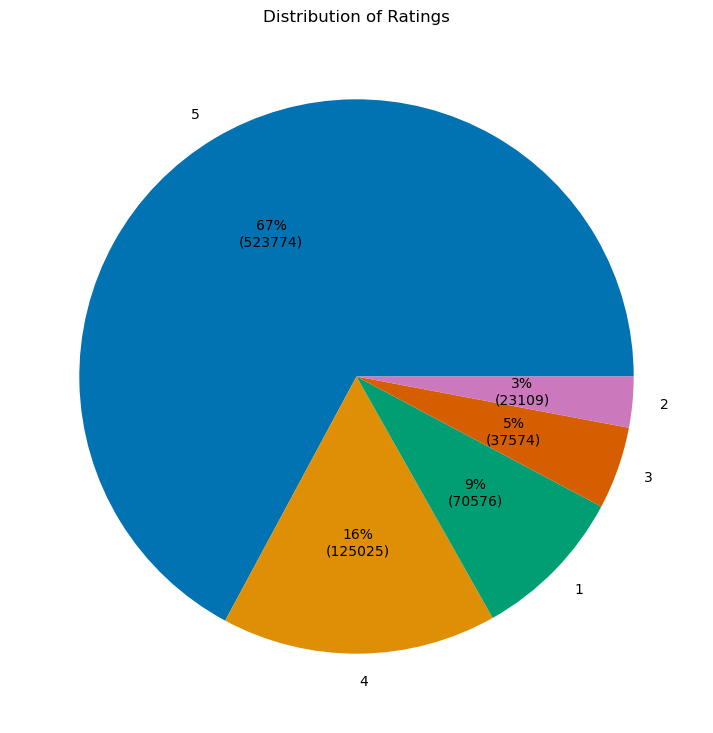

In [12]:
# lets see a distribution of all the ratings
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = waze_data['review_rating'].value_counts()
values = waze_data['review_rating']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)
labels = [5,4,1,3,2]

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Ratings')
  
# displaying chart 
plt.show() 

### Here’s the distribution of ratings from the Waze reviews dataset. As you can see, it gives a clear picture of how many reviews fall into each rating category (from 1 to 5).

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1: </h1>
<b>Which rating has the most reviews? Least reviews? </b>
</div>

- Rating number 5 has 523,774 reviews which makes up 67% of all the reviews.
- Rating number 2 has 23,109 reviews which makes up only 3% of all the reviews.

In [13]:
# lets now remove the null values from column review_text
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780058 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775544 non-null  object
 1   review_rating       780058 non-null  int64 
 2   author_app_version  696457 non-null  object
 3   review_timestamp    780058 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.8+ MB


In [14]:
# lets see how many null values there are
waze_data['review_text'].isnull().value_counts()

False    775544
True       4514
Name: review_text, dtype: int64

In [15]:
# lets show all the rows where review_rating is null
waze_data[waze_data['review_text'].isnull()]

,review_text,review_rating,author_app_version,review_timestamp
3517,NaN,5,2.4.0.1,2011-08-15 19:07:14
64133,NaN,4,3.7.2.0,2013-06-29 08:18:36
119143,NaN,5,3.7.7.0,2014-02-03 19:12:22
119148,NaN,5,3.7.7.0,2014-02-03 19:57:37
119149,NaN,1,3.7.7.0,2014-02-03 20:14:24
...,...,...,...,...
728625,NaN,1,4.73.0.3,2021-05-20 13:36:57
729919,NaN,1,4.73.0.3,2021-05-22 07:26:47
746168,NaN,4,4.79.0.2,2021-12-01 09:08:16
777429,NaN,4,4.93.1.0,2023-09-27 19:45:10


In [16]:
# lets now see the rows not having null value and save to dataset
waze_data = waze_data[ ~waze_data['review_text'].isnull()]
waze_data

,review_text,review_rating,author_app_version,review_timestamp
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43
...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26
780069,To stuck,1,NaN,2023-11-17 03:18:38
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02


In [17]:
# the null values in review_text column have been removed
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775544 entries, 0 to 780072
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775544 non-null  object
 1   review_rating       775544 non-null  int64 
 2   author_app_version  692138 non-null  object
 3   review_timestamp    775544 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.6+ MB


In [18]:
# Lets create sentiment labels for each review, classified as Positive, Negative, or Neutral
from textblob import TextBlob

def textblob_sentiment_analysis(review_text):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review_text).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews and creating new column
waze_data['Sentiment'] = waze_data['review_text'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
waze_data.head(5)

C:\Users\hardi\AppData\Local\Temp\ipykernel_10664\2193826534.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_data['Sentiment'] = waze_data['review_text'].apply(textblob_sentiment_analysis)


,review_text,review_rating,author_app_version,review_timestamp,Sentiment
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15,Positive
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43,Positive
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,Positive
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22,Positive
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43,Positive


## Analyzing App Reviews Sentiments

Now that our dataset is labelled, let’s perform app reviews sentiment analysis. 

We’ll begin by analyzing the distribution of sentiments across the dataset. It will give us a basic understanding of the general sentiment tendency in the reviews:

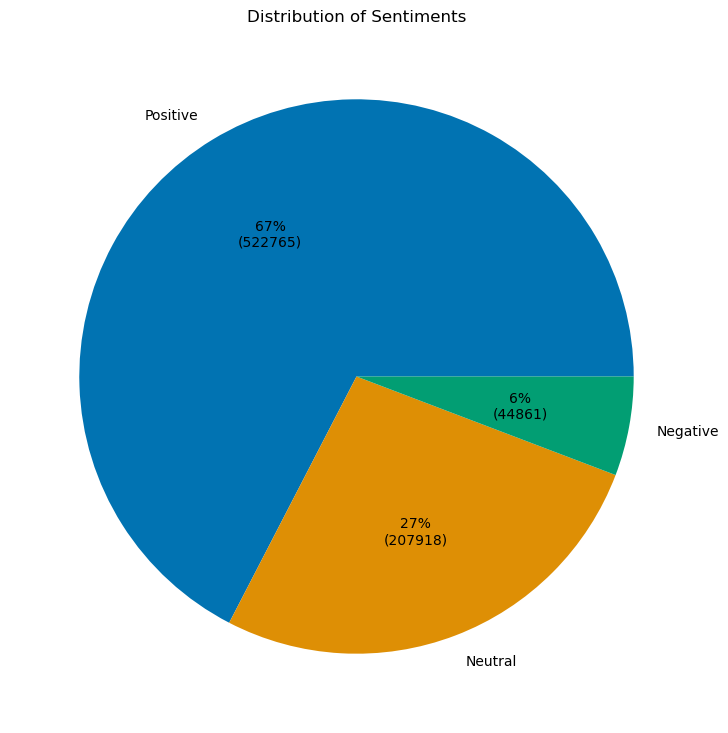

In [19]:
# lets see a distribution of all the ratings
import matplotlib.pyplot as plt 
import seaborn

sentiment_distribution = waze_data['Sentiment'].value_counts()
values = waze_data['Sentiment']
numbers = sentiment_distribution.index
quantity = sentiment_distribution.values
total = len(values)

# a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(sentiment_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments')
  
# displaying chart 
plt.show() 

### In addition to the app having high ratings, reviewers also had many positive words in the reviews for the app.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>
<b>What are the number of reviews for each sentiment? </b>
</div>

- The positive sentiment has a total of 522,765 reviews which equates to 67% of all reviews.</b>
- The neutral sentiment has a total of 207,918 reviews which equates to 27% of all reviews.</b>
- The negative sentiment has a total of 44,861 reviews which equates to 6% of all reviews.</b>

### Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. 

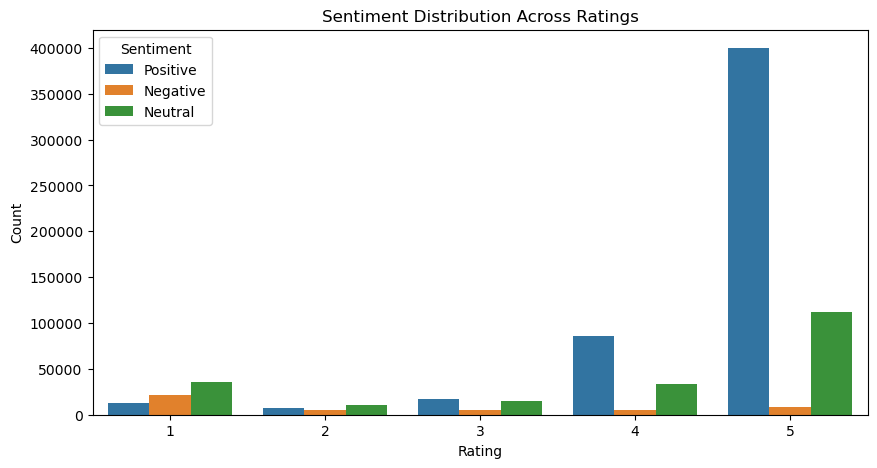

In [20]:
# lets take a look at the distribution of sentiments across the ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_data, x='review_rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### As you can see, most of the positive reviews fall within rating number 5 but most of the negative reviews fall within rating number 1.

In [21]:
# lets see how many total reviews make up the negative sentiment in rating number 1 
rateone_negative = waze_data[(waze_data['review_rating']== 1) & (waze_data['Sentiment'] == 'Negative')]
rateone_negative

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,Negative
61,Cant do broad searches like (Gas station miami...,1,0.99.2.7,2009-08-25 02:50:45,Negative
71,Crap.. doesent work,1,1.2.0,2009-09-11 15:40:04,Negative
110,Slow and buggy,1,1.3.0,2009-10-18 19:06:31,Negative
114,Dumb app. Uninstalling. Dont waste your time.,1,1.3.1,2009-10-19 14:42:59,Negative
...,...,...,...,...,...
780031,give the wrong direction which is can can't go...,1,4.96.1.0,2023-11-16 04:02:32,Negative
780037,Always Give wrong location,1,4.73.0.3,2023-11-16 07:01:38,Negative
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,Negative
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,Negative


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>
<b>Based off the findings from the sentiment distribution across ratings chart, the negative sentiment is at its highest in rating number 1. How many reviews make up this sentiment?</b>
</div>

There are a total of 21,987 reviews which make up the negative sentiment in rating number 1.

### Let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

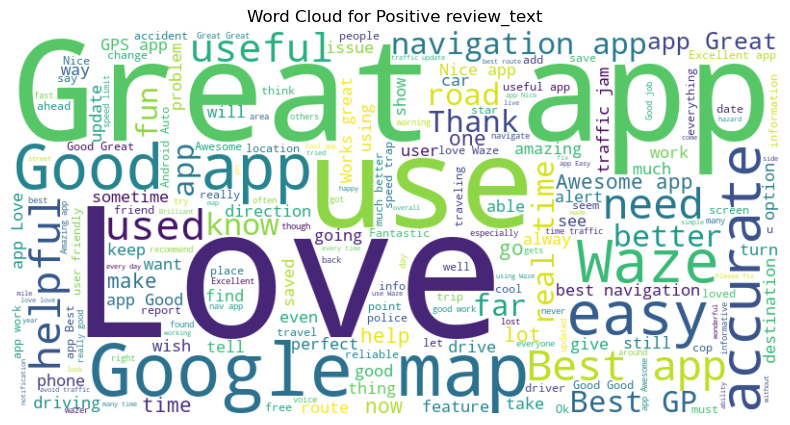

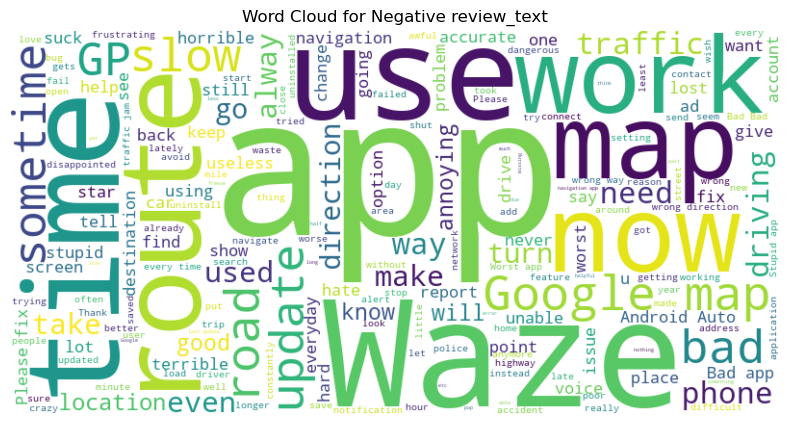

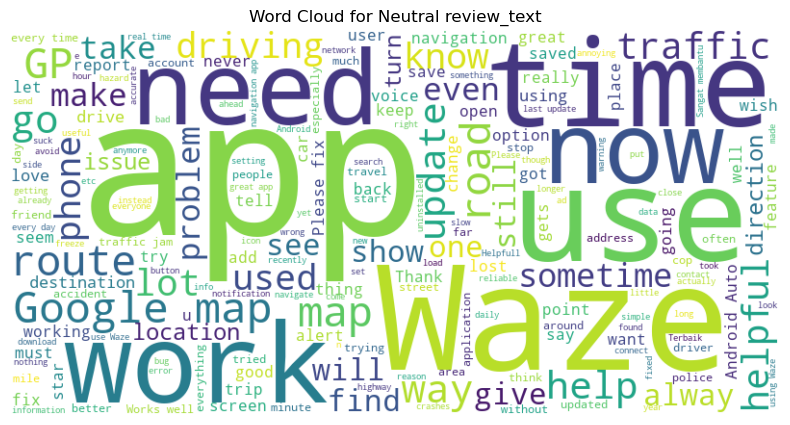

In [22]:
# lets take a look at the most used words in each positive, negative and neutral sentiment
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in waze_data[waze_data['Sentiment'] == sentiment]['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} review_text')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)    
    

### Lets now take a look at two random author app versions to see how many reviews each has and how they compare with each other.

In [23]:
#pd.set_option('display.max_rows', 325)
# lets take a look at two author app versions and evaluate sentiment reviews and then compare
author_version = ['3.9.4.0','4.73.0.3']

In [24]:
# lets save as a new dataset
two_versions = waze_data[waze_data['author_app_version'].isin(author_version)]
two_versions

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
233145,צריך להגדיר כפרים עויינים ליהודים. כמו עוטף יר...,3,3.9.4.0,2015-03-11 14:46:01,Neutral
233146,"I really like using Waze, however I have one s...",4,3.9.4.0,2015-03-11 14:46:43,Neutral
233147,"Cab driver, this rocks ,highly suggest this ap...",5,3.9.4.0,2015-03-11 14:48:26,Positive
233148,Easy in use,4,3.9.4.0,2015-03-11 14:52:01,Positive
233149,Love it,5,3.9.4.0,2015-03-11 14:55:58,Positive
...,...,...,...,...,...
775914,Nice,5,4.73.0.3,2023-08-25 16:36:05,Positive
776198,Wonderful and marvellous p perfect and so easy...,5,4.73.0.3,2023-09-01 12:41:36,Positive
777733,Excellent,5,4.73.0.3,2023-10-04 23:26:09,Positive
778531,The route keep changing,1,4.73.0.3,2023-10-20 06:33:54,Neutral


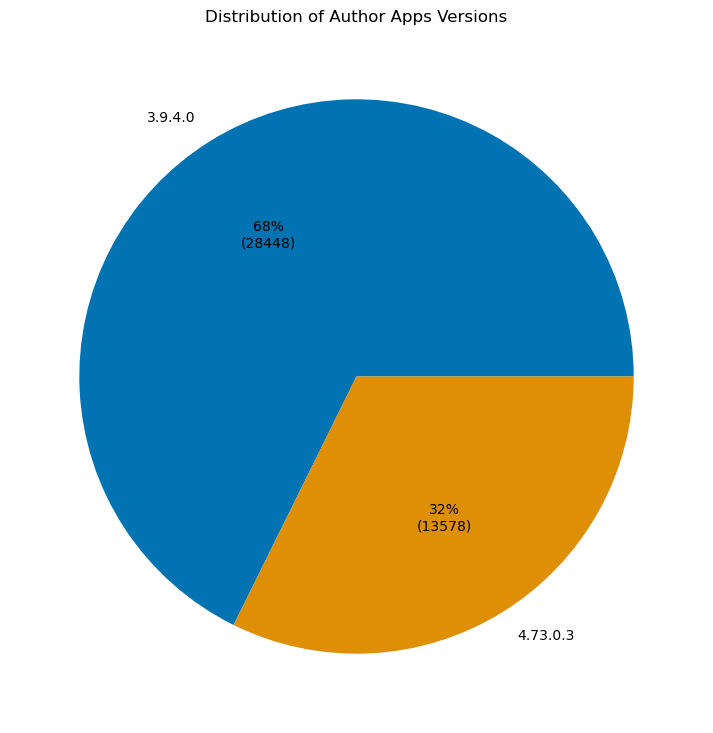

In [25]:
# lets see a distribution of the author app versions
import matplotlib.pyplot as plt 
import seaborn

version_distribution = two_versions['author_app_version'].value_counts()
values = two_versions['author_app_version']
numbers = version_distribution.index
quantity = version_distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(version_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Author Apps Versions')
  
# displaying chart 
plt.show() 


### As you can see, there are much more reviews from author app version 3.9.4.0 as compared to version 4.73.0.3

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #4: </h1>
<b>Based off the findings from the distribution of author apps versions chart, which version has the most reviews and which has the least?</b>
</div>

- version 3.9.4.0 has the most reviews being 28,448 which is 68% out of both versions.
- version 4.73.0.3 has the least reviews being 13,578 which is 32% out of both versions.

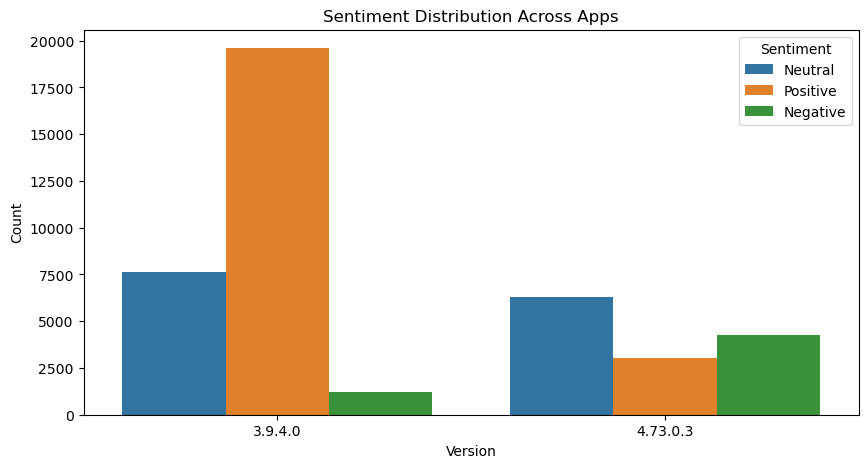

In [26]:
# lets take a look at the distribution of sentiments across both author app versions
plt.figure(figsize=(10, 5))
sns.countplot(data=two_versions, x='author_app_version', hue='Sentiment')
plt.title('Sentiment Distribution Across Apps')
plt.xlabel('Version')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### As you can see, version 3.9.4.0 has more positive and neutral sentiments than 4.73.0.3, but 4.73.0.3 has more negative.

### Lets now create individual datasets for each version so that we can answer a few questions.

In [27]:
version_1 = two_versions.loc[two_versions['author_app_version']== '3.9.4.0']
version_1

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
233145,צריך להגדיר כפרים עויינים ליהודים. כמו עוטף יר...,3,3.9.4.0,2015-03-11 14:46:01,Neutral
233146,"I really like using Waze, however I have one s...",4,3.9.4.0,2015-03-11 14:46:43,Neutral
233147,"Cab driver, this rocks ,highly suggest this ap...",5,3.9.4.0,2015-03-11 14:48:26,Positive
233148,Easy in use,4,3.9.4.0,2015-03-11 14:52:01,Positive
233149,Love it,5,3.9.4.0,2015-03-11 14:55:58,Positive
...,...,...,...,...,...
742281,Bottom line it sucks.. You have to spend to mu...,1,3.9.4.0,2021-09-22 03:59:07,Neutral
755078,Works fine,5,3.9.4.0,2022-05-11 01:36:16,Positive
755100,Telling me to obey the law and other safety th...,2,3.9.4.0,2022-05-11 14:20:21,Negative
760440,Does not run well on my android device.,3,3.9.4.0,2022-08-23 20:37:34,Neutral


In [28]:
version_1[version_1['Sentiment']== 'Negative']

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
233188,Compared to other nav apps. Always gets me to ...,5,3.9.4.0,2015-03-11 17:13:34,Negative
233258,"I love this app, use it everyday and it keeps ...",5,3.9.4.0,2015-03-11 20:40:46,Negative
233275,I do not drive anywhere without using Waze! Th...,5,3.9.4.0,2015-03-11 21:42:42,Negative
233334,I use it everyday,5,3.9.4.0,2015-03-11 23:56:11,Negative
233360,Traffic can be heavy or at least unpredictable...,5,3.9.4.0,2015-03-12 00:37:03,Negative
...,...,...,...,...,...
720944,Horrible,1,3.9.4.0,2021-05-16 18:18:42,Negative
728401,Bad,1,3.9.4.0,2021-05-20 11:49:22,Negative
730007,Not good don't use it..useless..,1,3.9.4.0,2021-05-22 13:30:02,Negative
755100,Telling me to obey the law and other safety th...,2,3.9.4.0,2022-05-11 14:20:21,Negative


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5: </h1>
<b>Based off the findings from the sentiment distribution across apps chart, version 4.73.0.3 has more negative sentiments than version 3.9.4.0. How many negative reviews are in this sentiment? How many negative reviews are in 3.9.4.0?</b>
</div>

- There are a total of 4,254 negative reviews within version 4.73.0.3 which is 78% out of both versions.
- There are a total of 1,229 negative reviews within version 3.9.4.0 which is 22% out of both versions.

In [29]:
version_2 = two_versions.loc[two_versions['author_app_version']== '4.73.0.3']
version_2

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
707339,Best app doesn't give wrong information.,5,4.73.0.3,2021-04-06 17:18:42,Positive
707343,I don't what's happened seen last year doesn't...,1,4.73.0.3,2021-04-06 18:45:39,Neutral
707348,Please work on adding all the roads and all th...,5,4.73.0.3,2021-04-06 19:10:53,Positive
707349,"Very useful, but sometimes takes you via stran...",4,4.73.0.3,2021-04-06 19:10:59,Positive
707351,"This is a really good app, I just wish I could...",4,4.73.0.3,2021-04-06 19:19:14,Positive
...,...,...,...,...,...
775914,Nice,5,4.73.0.3,2023-08-25 16:36:05,Positive
776198,Wonderful and marvellous p perfect and so easy...,5,4.73.0.3,2023-09-01 12:41:36,Positive
777733,Excellent,5,4.73.0.3,2023-10-04 23:26:09,Positive
778531,The route keep changing,1,4.73.0.3,2023-10-20 06:33:54,Neutral


In [30]:
version_2[version_2['Sentiment']== 'Negative']

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
707394,Unable to get a proper ETA anywhere in the cit...,1,4.73.0.3,2021-04-07 02:35:58,Negative
707450,"Always had issues, always down",2,4.73.0.3,2021-04-07 16:40:55,Negative
707477,Lately waze is diverting off freeway until sid...,4,4.73.0.3,2021-04-07 22:36:26,Negative
707484,Not working anymore when open app in the morni...,1,4.73.0.3,2021-04-08 00:12:29,Negative
707626,All of a sudden one day I set a destination an...,1,4.73.0.3,2021-04-09 12:26:27,Negative
...,...,...,...,...,...
763341,Disappointed. Too complicated to send report o...,3,4.73.0.3,2022-10-31 10:14:51,Negative
763622,Seriously sucks,1,4.73.0.3,2022-11-08 09:31:47,Negative
766386,Waze is completely useless for 1-2 weeks now o...,1,4.73.0.3,2023-01-16 22:56:35,Negative
770057,Useless without speed camera alerts. Cannot di...,2,4.73.0.3,2023-04-24 06:06:14,Negative


### Lets now compare sentiments from both Author app versions and see if there are any major differences.

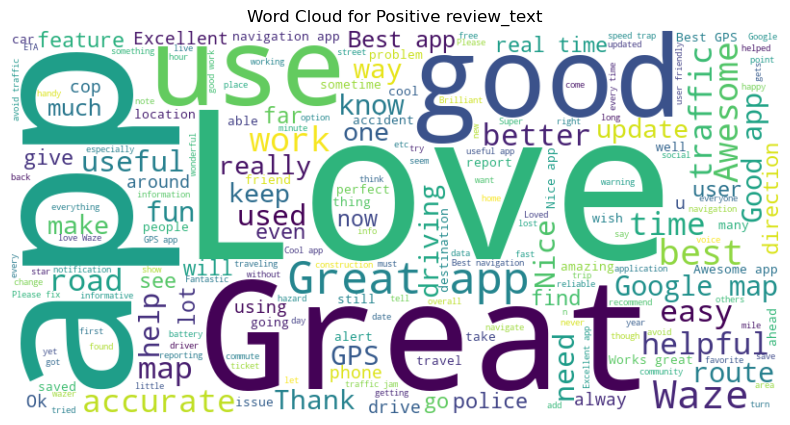

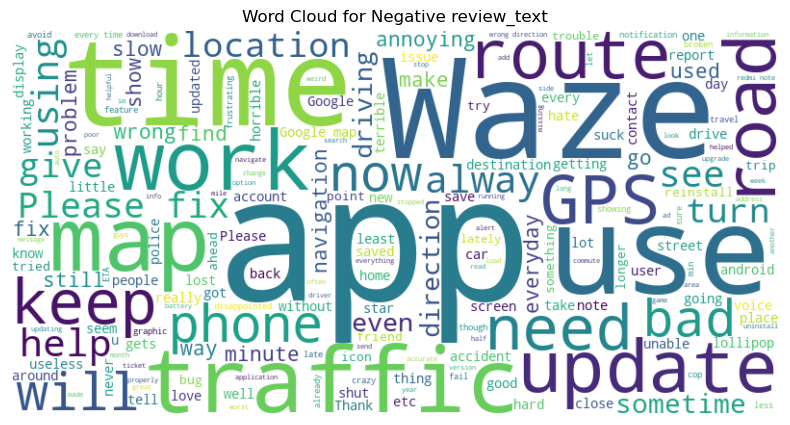

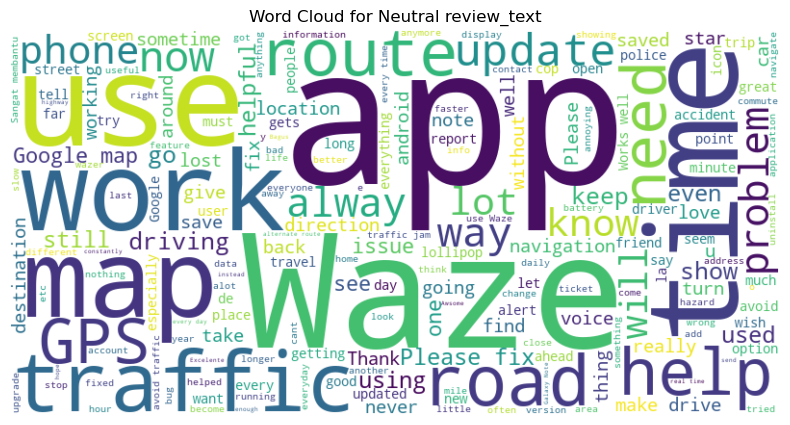

In [31]:
# For author app 3.9.4.0,lets take a look at the most used words in each positive, negative and neutral sentiment
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in version_1[version_1['Sentiment'] == sentiment]['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} review_text')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)      
  

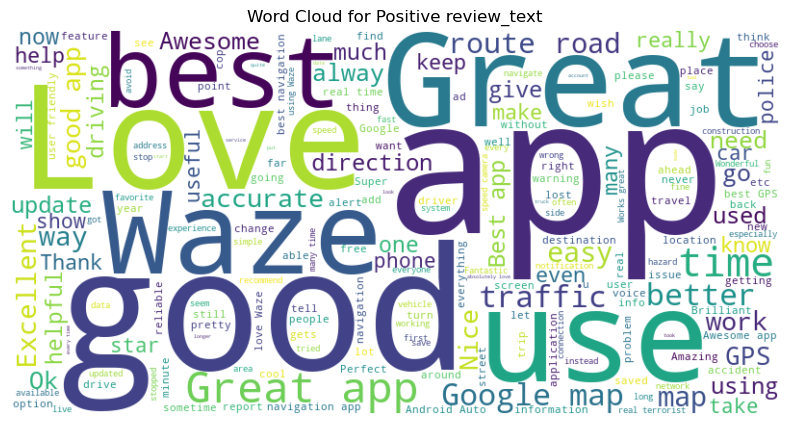

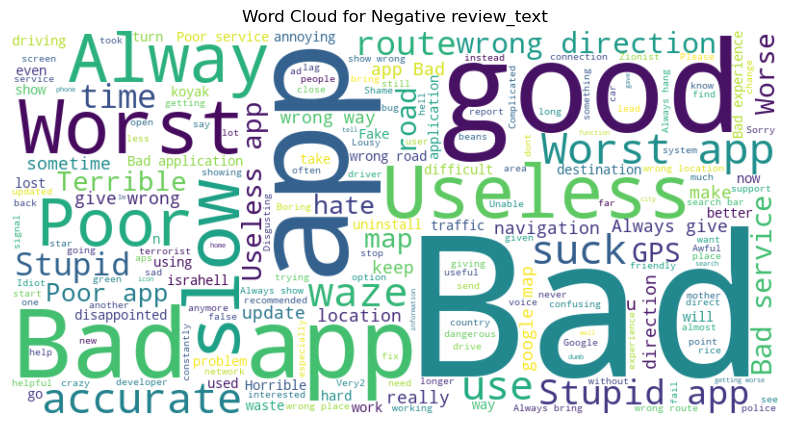

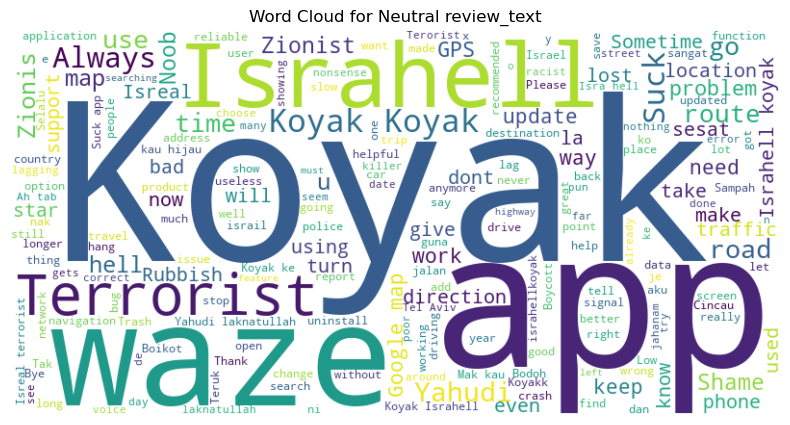

In [32]:
# For author app 4.73.0.3,lets take a look at the most used words in each positive, negative and neutral sentiment
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in version_2[version_2['Sentiment'] == sentiment]['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} review_text')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)
    

### As you can see, there are more negative words used in the Word Cloud for negative review text in version 4.73.0.3 than in version 3.9.4.0.

### Lets now take a look at each of the years, how many reviews they each have and comparrisons.

In [33]:
# lets take a look at our original dataset
waze_data

,review_text,review_rating,author_app_version,review_timestamp,Sentiment
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15,Positive
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43,Positive
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,Positive
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22,Positive
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43,Positive
...,...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26,Neutral
780069,To stuck,1,NaN,2023-11-17 03:18:38,Neutral
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20,Neutral
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02,Neutral


In [34]:
# We need to create a year column, but first need to change dataype of column review_timestamp to datetime64
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775544 entries, 0 to 780072
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         775544 non-null  object
 1   review_rating       775544 non-null  int64 
 2   author_app_version  692138 non-null  object
 3   review_timestamp    775544 non-null  object
 4   Sentiment           775544 non-null  object
dtypes: int64(1), object(4)
memory usage: 35.5+ MB


In [35]:
waze_data['review_timestamp'] = pd.to_datetime(waze_data['review_timestamp'])

C:\Users\hardi\AppData\Local\Temp\ipykernel_10664\3000617213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_data['review_timestamp'] = pd.to_datetime(waze_data['review_timestamp'])


In [36]:
# The datatype has now been changed
waze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775544 entries, 0 to 780072
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_text         775544 non-null  object        
 1   review_rating       775544 non-null  int64         
 2   author_app_version  692138 non-null  object        
 3   review_timestamp    775544 non-null  datetime64[ns]
 4   Sentiment           775544 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 35.5+ MB


In [37]:
# lets add a column called review_year which shows the year of each review
waze_data['review_year'] = waze_data['review_timestamp'].dt.year

C:\Users\hardi\AppData\Local\Temp\ipykernel_10664\986905470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_data['review_year'] = waze_data['review_timestamp'].dt.year


In [38]:
# the column has been added
waze_data

,review_text,review_rating,author_app_version,review_timestamp,Sentiment,review_year
0,Nice app need to add red light cam.,5,0.99.2.3,2009-06-30 16:48:15,Positive,2009
1,Really cool social app. Lots of potential to b...,5,0.99.2.3,2009-06-30 16:58:43,Positive,2009
2,I was all excited about this app (ehat a great...,1,0.99.2.3,2009-06-30 17:08:33,Positive,2009
3,I love this app! Lol,5,0.99.2.3,2009-06-30 17:37:22,Positive,2009
4,Great app i like the idea of your car being pa...,4,0.99.2.3,2009-06-30 23:58:43,Positive,2009
...,...,...,...,...,...,...
780068,Freezes,3,NaN,2023-11-17 03:18:26,Neutral,2023
780069,To stuck,1,NaN,2023-11-17 03:18:38,Neutral,2023
780070,racist made app,1,4.99.0.2,2023-11-17 03:23:20,Neutral,2023
780071,بهترین مثل همیشه.با آی پی ثابت های کانال تلگرا...,5,4.99.1.1,2023-11-17 04:05:02,Neutral,2023


In [39]:
# lets see how many years are within this dataset
year_distribution = waze_data['review_year'].value_counts()
year_distribution

2016    132491
2017    127428
2015    117048
2014     99716
2013     76594
2021     49998
2019     40075
2018     33279
2020     31942
2012     28807
2022     17857
2023     14343
2011      4595
2010      1131
2009       240
Name: review_year, dtype: int64

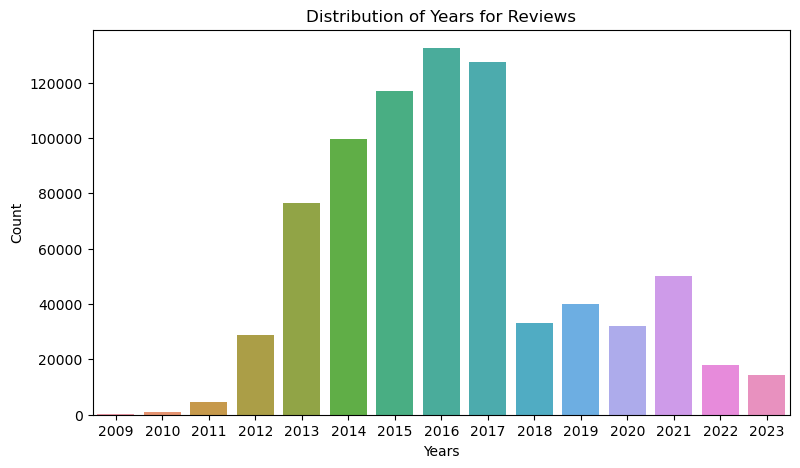

In [40]:
# lets now plot the distribution of years for reviews
plt.figure(figsize=(9, 5))
sns.barplot(x=year_distribution.index, y=year_distribution.values)
plt.title('Distribution of Years for Reviews')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #6: </h1>
<b>Based off the findings from the distribution of years for reviews chart, which three years contained the most reviews and which year had the least amount of reviews overall?</b>
</div>

- Year 2016 has a total of 132,491 reviews which equates to 17% of all reviews in a 15 year span.
- Year 2017 has a total of 127,428 reviews which equates to 16% of all reviews in a 15 year span.
- Year 2015 has a total of 117,048 reviews which equates to 15% of all reviews in a 15 year span.
- Year 2009 has a total of 240 reviews which equates to 0.00030946 of all reviews in a 15 year span.

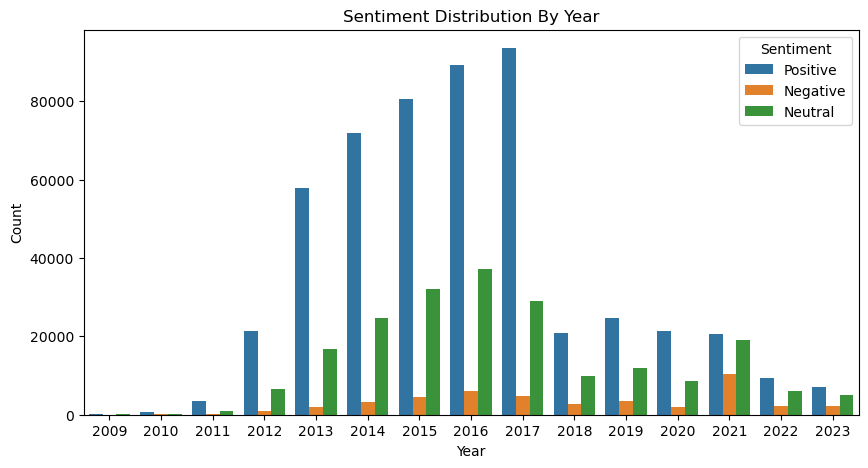

In [41]:
# lets take a look at the distribution of sentiments across the years
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_data, x='review_year', hue='Sentiment')
plt.title('Sentiment Distribution By Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #7: </h1>
<b>Based off the findings from the sentiment distribution by year chart, the year with the most negative sentiments is 2021.</b>  
    
<b>How many negative reviews were placed and the percentage out of all negative sentiments?</b>
 
<b>How many negative reviews were from author app versions 4.73.0.3 and 3.9.4.0?</b>
</div>

- For the year 2021, there was a total of 10,383 reviews placed which is 23% of all the negative sentiments.
- Out of the 10,383 negative reviews 4,244(41%) of them are from the author app version 4.73.0.3, and 9(9%) are from version 3.9.4.0.

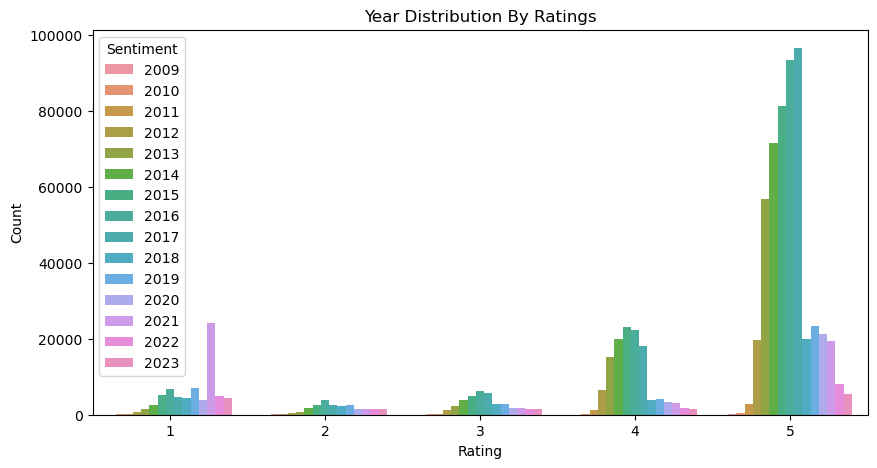

In [42]:
# Distribution of years across Ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=waze_data, x='review_rating', hue='review_year')
plt.title('Year Distribution By Ratings')
plt.xlabel('Rating')      
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### We see that in rating number 1 there is a large percent of reviews from year 2021 than any other year.

### It would be good to know how many reviews encompass the positive, negative, and neutral sentiments.

In [43]:
# lets take a look at the year 2021 data
year_2021 = waze_data[waze_data['review_year']== 2021]
year_2021

,review_text,review_rating,author_app_version,review_timestamp,Sentiment,review_year
697858,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,Negative,2021
697859,Good,5,NaN,2021-01-01 01:03:29,Positive,2021
697860,I was looking for an alternative to Google so ...,2,4.69.0.3,2021-01-01 02:10:04,Neutral,2021
697861,So Good,5,4.67.0.4,2021-01-01 02:17:00,Positive,2021
697862,Where is Tamil language..,3,4.64.1.0,2021-01-01 03:10:34,Neutral,2021
...,...,...,...,...,...,...
747866,I wish they had other social media links,5,4.79.0.2,2021-12-31 20:12:52,Neutral,2021
747867,Basically unusable in landscape. Why do we nee...,1,4.79.0.2,2021-12-31 20:19:09,Positive,2021
747868,"Flaky, I hate sent a link from my daughter on ...",1,NaN,2021-12-31 21:51:59,Negative,2021
747869,I love this app,5,4.79.0.2,2021-12-31 22:43:47,Positive,2021


In [44]:
# lets change index to reflect the sentiments
year_2021.set_index('Sentiment',inplace=True)

In [45]:
# lets now take a look at the dataset
year_2021

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Positive,Good,5,NaN,2021-01-01 01:03:29,2021
Neutral,I was looking for an alternative to Google so ...,2,4.69.0.3,2021-01-01 02:10:04,2021
Positive,So Good,5,4.67.0.4,2021-01-01 02:17:00,2021
Neutral,Where is Tamil language..,3,4.64.1.0,2021-01-01 03:10:34,2021
...,...,...,...,...,...
Neutral,I wish they had other social media links,5,4.79.0.2,2021-12-31 20:12:52,2021
Positive,Basically unusable in landscape. Why do we nee...,1,4.79.0.2,2021-12-31 20:19:09,2021
Negative,"Flaky, I hate sent a link from my daughter on ...",1,NaN,2021-12-31 21:51:59,2021


In [46]:
neg = year_2021.loc[ 'Negative'] 
neg

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Negative,"I want to like it, i really do. But it's annoy...",3,4.69.0.3,2021-01-01 04:20:06,2021
Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
Negative,"I use it when Google can't find a street, beca...",3,4.69.0.3,2021-01-02 15:16:02,2021
Negative,Sometimes it picks up the wrong State and send...,3,4.69.0.3,2021-01-02 18:36:24,2021
...,...,...,...,...,...
Negative,"Been experiencing no network connection, even ...",2,4.79.0.2,2021-12-31 02:27:31,2021
Negative,why not to connect gps on my approximate locat...,1,NaN,2021-12-31 06:25:02,2021
Negative,I'd give it no stars at allllllll! It lead me ...,1,NaN,2021-12-31 17:24:40,2021


In [47]:
# lets see how many of these negative reviews are from the author app version 4.73.0.3
neg[neg['author_app_version']== '4.73.0.3']

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,Unable to get a proper ETA anywhere in the cit...,1,4.73.0.3,2021-04-07 02:35:58,2021
Negative,"Always had issues, always down",2,4.73.0.3,2021-04-07 16:40:55,2021
Negative,Lately waze is diverting off freeway until sid...,4,4.73.0.3,2021-04-07 22:36:26,2021
Negative,Not working anymore when open app in the morni...,1,4.73.0.3,2021-04-08 00:12:29,2021
Negative,All of a sudden one day I set a destination an...,1,4.73.0.3,2021-04-09 12:26:27,2021
...,...,...,...,...,...
Negative,Horrible GPS app I deliver medical equipment a...,1,4.73.0.3,2021-10-05 19:47:01,2021
Negative,Bad service,3,4.73.0.3,2021-10-24 05:57:23,2021
Negative,Not speaking in Persian. speaking very late .i...,3,4.73.0.3,2021-10-26 21:26:52,2021


In [48]:
# lets see how many of these negative reviews are from the author app version 3.9.4.0
neg[neg['author_app_version']== '3.9.4.0']

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,Wasted my time using Zionist apps,1,3.9.4.0,2021-05-15 03:01:46,2021
Negative,Bad,1,3.9.4.0,2021-05-15 22:30:10,2021
Negative,bias liar terrible horrible,1,3.9.4.0,2021-05-16 04:10:09,2021
Negative,this apps horrible,1,3.9.4.0,2021-05-16 09:40:23,2021
Negative,Very bad app!,1,3.9.4.0,2021-05-16 12:14:31,2021
Negative,Poor,1,3.9.4.0,2021-05-16 12:19:11,2021
Negative,Horrible,1,3.9.4.0,2021-05-16 18:18:42,2021
Negative,Bad,1,3.9.4.0,2021-05-20 11:49:22,2021
Negative,Not good don't use it..useless..,1,3.9.4.0,2021-05-22 13:30:02,2021


### So, out of the 10,383 negative reviews in year 2021 approximatley 4,244 (41%) of them are from the author app version 4.73.0.3, and 9 (9%) are from version 3.9.4.0.

In [49]:
# This is the dataset for the negative sentiment within rating number 1
neg_rating1 = neg[neg['review_rating'] == 1]
neg_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
Negative,Sometimes this gives us wrong direction,1,4.69.0.3,2021-01-03 07:55:22,2021
Negative,"Stupid app won't load, yet it continues to gro...",1,NaN,2021-01-03 14:21:29,2021
Negative,No good,1,4.66.0.1,2021-01-03 15:33:09,2021
...,...,...,...,...,...
Negative,Horrible! Took me on a convoluted route throug...,1,4.79.0.2,2021-12-30 17:34:25,2021
Negative,"Used to work ""not so"" well. Now ""unable"" to wo...",1,4.78.0.2,2021-12-30 17:41:12,2021
Negative,why not to connect gps on my approximate locat...,1,NaN,2021-12-31 06:25:02,2021


In [50]:
# lets see how many of these negative reviews in rating number 1 are from the author app version 4.73.0.3
neg_rating1[neg_rating1['author_app_version']== '4.73.0.3']

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,Unable to get a proper ETA anywhere in the cit...,1,4.73.0.3,2021-04-07 02:35:58,2021
Negative,Not working anymore when open app in the morni...,1,4.73.0.3,2021-04-08 00:12:29,2021
Negative,All of a sudden one day I set a destination an...,1,4.73.0.3,2021-04-09 12:26:27,2021
Negative,Really bad responsiveness. Kept opening menus ...,1,4.73.0.3,2021-04-09 21:51:38,2021
Negative,very slow,1,4.73.0.3,2021-04-10 03:31:04,2021
...,...,...,...,...,...
Negative,I was in difficult situation and you guys came...,1,4.73.0.3,2021-08-31 16:27:28,2021
Negative,I was able to use the app with no problem. eve...,1,4.73.0.3,2021-09-02 18:58:52,2021
Negative,Horrible GPS app I deliver medical equipment a...,1,4.73.0.3,2021-10-05 19:47:01,2021


In [51]:
# lets see how many of these negative reviews in rating number 1 are from the author app version 3.9.4.0
neg_rating1[neg_rating1['author_app_version']== '3.9.4.0']

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,Wasted my time using Zionist apps,1,3.9.4.0,2021-05-15 03:01:46,2021
Negative,Bad,1,3.9.4.0,2021-05-15 22:30:10,2021
Negative,bias liar terrible horrible,1,3.9.4.0,2021-05-16 04:10:09,2021
Negative,this apps horrible,1,3.9.4.0,2021-05-16 09:40:23,2021
Negative,Very bad app!,1,3.9.4.0,2021-05-16 12:14:31,2021
Negative,Poor,1,3.9.4.0,2021-05-16 12:19:11,2021
Negative,Horrible,1,3.9.4.0,2021-05-16 18:18:42,2021
Negative,Bad,1,3.9.4.0,2021-05-20 11:49:22,2021
Negative,Not good don't use it..useless..,1,3.9.4.0,2021-05-22 13:30:02,2021


### So, out of the 9,413 negative reviews in rating number 1 for year 2021 approximatley 4,136 (44%) of them are from the author app version 4.73.0.3, and 9 (10%) are from version 3.9.4.0.

In [52]:
pos = year_2021.loc['Positive']
pos

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Positive,Good,5,NaN,2021-01-01 01:03:29,2021
Positive,So Good,5,4.67.0.4,2021-01-01 02:17:00,2021
Positive,Love it...accept when u have some kid about ha...,5,4.69.0.3,2021-01-01 05:38:17,2021
Positive,New update no sugestion?? Please make an updat...,3,4.69.0.3,2021-01-01 07:08:11,2021
Positive,Great,5,4.67.0.4,2021-01-01 07:22:13,2021
...,...,...,...,...,...
Positive,"Best sat nav app, ever. Real time feedback on ...",5,4.79.0.2,2021-12-31 17:50:18,2021
Positive,It's awesome,5,4.79.0.2,2021-12-31 19:40:41,2021
Positive,Basically unusable in landscape. Why do we nee...,1,4.79.0.2,2021-12-31 20:19:09,2021


In [53]:
# This is the dataset for the positive sentiment within rating number 1
pos_rating1 = pos[pos['review_rating'] == 1]
pos_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Positive,"Now, with mandatory car-pooling suppositories ...",1,4.69.0.3,2021-01-02 21:07:50,2021
Positive,good for travellers,1,4.68.2.0,2021-01-03 09:20:46,2021
Positive,It always made us go out of nowhere and the ro...,1,NaN,2021-01-06 01:33:45,2021
Positive,ALWAYS APPROXIMATELY NO GPS! My GPS on and my ...,1,4.15.0.2,2021-01-06 16:35:18,2021
Positive,I have originally given 5 stars to Waze. But I...,1,4.69.0.3,2021-01-07 05:57:38,2021
...,...,...,...,...,...
Positive,Very good,1,NaN,2021-12-29 11:00:35,2021
Positive,Initially this app was amazing!!! Now??? It no...,1,4.79.0.2,2021-12-29 22:32:14,2021
Positive,Good but china spyOMG on Malaysia,1,NaN,2021-12-30 05:28:24,2021


In [54]:
neu = year_2021.loc['Neutral']
neu

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Neutral,I was looking for an alternative to Google so ...,2,4.69.0.3,2021-01-01 02:10:04,2021
Neutral,Where is Tamil language..,3,4.64.1.0,2021-01-01 03:10:34,2021
Neutral,Ends up taking more than google maps takes thr...,1,NaN,2021-01-01 05:28:29,2021
Neutral,Like,5,4.69.0.3,2021-01-01 06:02:04,2021
Neutral,Been using this app for months now but suddenl...,1,4.69.0.3,2021-01-01 07:58:45,2021
...,...,...,...,...,...
Neutral,wow so suck,1,NaN,2021-12-31 15:16:23,2021
Neutral,👍,5,4.79.0.2,2021-12-31 16:18:06,2021
Neutral,Waze -Gps,3,NaN,2021-12-31 17:00:41,2021


In [55]:
# This is the dataset for the neutral sentiment within rating number 1
neu_rating1 = neu[neu['review_rating'] == 1]
neu_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Neutral,Ends up taking more than google maps takes thr...,1,NaN,2021-01-01 05:28:29,2021
Neutral,Been using this app for months now but suddenl...,1,4.69.0.3,2021-01-01 07:58:45,2021
Neutral,This new version is less effective bcoz its ha...,1,4.69.0.3,2021-01-01 09:39:38,2021
Neutral,Not opening at all,1,4.69.0.3,2021-01-01 21:49:42,2021
Neutral,Selling your data. use google,1,NaN,2021-01-01 22:56:32,2021
...,...,...,...,...,...
Neutral,"For years Waze was my ""go to"" app when traveli...",1,4.79.0.2,2021-12-30 21:03:02,2021
Neutral,Wow. This app will take you in a zig zag or a ...,1,4.79.0.2,2021-12-31 04:05:37,2021
Neutral,"Waze of gas,..",1,4.79.0.2,2021-12-31 11:13:00,2021


In [56]:
# lets take a look at the total number of negative reviews within the entire dataset
waze_data[waze_data['Sentiment']== 'Negative']

,review_text,review_rating,author_app_version,review_timestamp,Sentiment,review_year
8,"It uses SD card for pictures, which makes it i...",3,0.99.2.3,2009-07-04 14:03:05,Negative,2009
13,This program cannot find any locations that i ...,2,0.99.2.3,2009-07-09 13:56:58,Negative,2009
18,"Good start,but maps are poor, app is very slow...",3,0.99.2.7,2009-07-10 15:02:24,Negative,2009
23,"Love the Idea, Just needs a lot Improvement (l...",3,0.99.2.7,2009-07-13 05:05:33,Negative,2009
27,Do not download will fill phone with hundreds ...,1,0.99.2.7,2009-07-19 17:40:47,Negative,2009
...,...,...,...,...,...,...
780037,Always Give wrong location,1,4.73.0.3,2023-11-16 07:01:38,Negative,2023
780045,annoying,2,NaN,2023-11-16 13:12:47,Negative,2023
780052,The worst apps 👎,1,4.66.0.1,2023-11-16 16:57:41,Negative,2023
780061,Loses signal often,1,4.99.0.2,2023-11-16 21:14:34,Negative,2023


In [57]:
# lets combine all three datasets so that we can visualize the distribution of sentiments in rating number 1 for 2021
negsentiment_rating1 = pd.concat([neg_rating1, pos_rating1, neu_rating1])
negsentiment_rating1

,review_text,review_rating,author_app_version,review_timestamp,review_year
Sentiment,,,,,
Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
Negative,Sometimes this gives us wrong direction,1,4.69.0.3,2021-01-03 07:55:22,2021
Negative,"Stupid app won't load, yet it continues to gro...",1,NaN,2021-01-03 14:21:29,2021
Negative,No good,1,4.66.0.1,2021-01-03 15:33:09,2021
...,...,...,...,...,...
Neutral,"For years Waze was my ""go to"" app when traveli...",1,4.79.0.2,2021-12-30 21:03:02,2021
Neutral,Wow. This app will take you in a zig zag or a ...,1,4.79.0.2,2021-12-31 04:05:37,2021
Neutral,"Waze of gas,..",1,4.79.0.2,2021-12-31 11:13:00,2021


In [58]:
# lets reset the index so that the Sentiments can be a column
negsentiment_rating1.reset_index(inplace=True)

In [59]:
negsentiment_rating1

,Sentiment,review_text,review_rating,author_app_version,review_timestamp,review_year
0,Negative,This app make a very ba decision if you dont k...,1,4.69.0.3,2021-01-01 00:33:51,2021
1,Negative,From port dickson heading to ioi city mall..wa...,1,4.69.0.3,2021-01-01 06:35:16,2021
2,Negative,Sometimes this gives us wrong direction,1,4.69.0.3,2021-01-03 07:55:22,2021
3,Negative,"Stupid app won't load, yet it continues to gro...",1,NaN,2021-01-03 14:21:29,2021
4,Negative,No good,1,4.66.0.1,2021-01-03 15:33:09,2021
...,...,...,...,...,...,...
24207,Neutral,"For years Waze was my ""go to"" app when traveli...",1,4.79.0.2,2021-12-30 21:03:02,2021
24208,Neutral,Wow. This app will take you in a zig zag or a ...,1,4.79.0.2,2021-12-31 04:05:37,2021
24209,Neutral,"Waze of gas,..",1,4.79.0.2,2021-12-31 11:13:00,2021
24210,Neutral,Based on others experience.,1,NaN,2021-12-31 12:29:01,2021


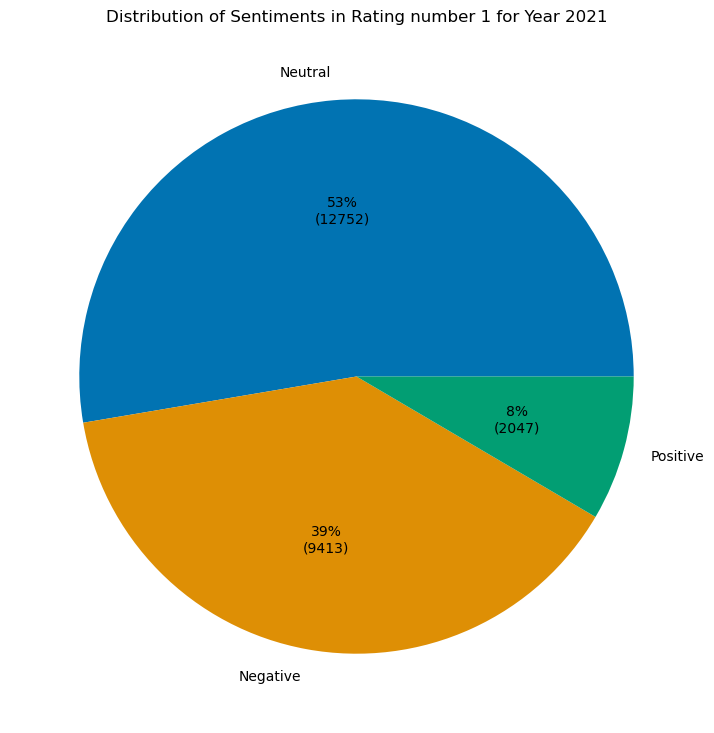

In [60]:
# lets now see the distribution of sentiments in rating number 1 for 2021
import matplotlib.pyplot as plt 
import seaborn

distribution = negsentiment_rating1['Sentiment'].value_counts()
values = negsentiment_rating1['Sentiment']
numbers = distribution.index
quantity = distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('colorblind') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Sentiments in Rating number 1 for Year 2021')
  
# displaying chart 
plt.show() 


We can now see the distribution of sentiments for the year 2021 in rating number 1. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #8: </h1>
<b> Based off the findings from the year distribution by ratings chart, We see that in rating number 1 there is a large percent of reviews from year 2021 than any other year.</b>
    
<b>How many reviews make up the positive, negative and neutral sentiments?</b>
    
<b> How many negative reviews are from author app versions 4.73.0.3 and 3.9.4.0?</b>   
</div>

- For positive sentiments the total number is 2,047 which equates to 8% for 2021.
- For negative sentiments the total number is 9,413 which equates to 39% for 2021.
- For neutral sentiments the total number is 12,752 which equates to 53% for 2021.
- Out of the 9,413 negative reviews in rating number 1 4,136(44%) of them are from the author app version 4.73.0.3, and 9(10%) are from version 3.9.4.0.